# Install package


In [1]:
!pip install emoji
!pip install pythainlp

     |████████████████████████████████| 175 kB 25.4 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=6e88e59002f7e8116eed64934bb583269307fafeeb75baaddd57e08c8c8802d3
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 11.5 MB 11.8 MB/s 


In [2]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

## Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
sheet1 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinovac_pfizer.xlsx',sheet_name='Sheet1')

In [5]:
sheet1.shape

(39, 3)

In [6]:
sheet1.head()

user_name     create_at  \
0   @fm91trafficpro   Mar 9, 2022   
1   @workpointTODAY  Feb 23, 2022   
2  @HakunaM21752470  Feb 22, 2022   
3     @Rachadaspoke  Feb 22, 2022   
4          @TNAMCOT  Feb 14, 2022   

                                                text  
0  "นพ.ยง" เปิดรับเด็ก 6-11 ปี ฉีดวัคซีนสูตรไขว้ ...  
1  ดีเดย์ 28 ก.พ.นี้ฉีดวัคซีนนร.สังกัด กทม. \n\n-...  
2  28 ก.พ.นี้ เริ่มฉีดวัคซีน #โควิด19 นักเรียนอาย...  
3  28 ก.พ.นี้ กทม.เริ่มฉีดวัคซีน #โควิด19 นักเรีย...  
4  กรมควบคุมโรค เผย 5 สูตรฉีดวัคซีนโควิด-19 ให้กล...

In [7]:
sheet2 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinovac_pfizer.xlsx',sheet_name='Sheet2')

In [8]:
sheet2.shape

(1, 3)

In [9]:
sheet2.head()

user_name     create_at                                               text
0  @kepat_ppn  Nov 12, 2021  เข็มแรก ซิโนแวค\nเข็ม2 ไฟเซอร์\nโอเค!!! วัยรุ่...

In [10]:
data1 = sheet1[['text']]
data2 = sheet2[['text']]
data3 = pd.concat([data1,data2])

In [11]:
data3.shape

(40, 1)

# Bag-of-Words

In [12]:
def slash_tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

d_data = data3["text"].dropna()
vectorizer = CountVectorizer(tokenizer=slash_tokenize)
transformed_data = vectorizer.fit_transform(d_data)
hash_tag_cnt_df= pd.DataFrame(columns = ['word', 'count']) 
hash_tag_cnt_df['word'] = vectorizer.get_feature_names()
hash_tag_cnt_df['count'] = np.ravel(transformed_data.sum(axis=0))
hash_tag_cnt_df.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
27                                               news      5
3   "วัคซีนโควิดเด็ก" สธ.เตรียมพิจารณาใช้สูตรไขว้ ...      3
34  กรมควบคุมโรค ย้ำ "วัคซีนเด็ก" 5 สูตร รวม "วัคซ...      3
32                                     thethaiger.com      2
23                                         hfocus.org      2
24                                             ift.tt      2
25                                    komchadluek.net      2
47  สธ. จ่อฉีดสูตรไขว้ ซิโนแวค-ไฟเซอร์ เด็ก 6-11 ป...      2
15                                    504921?twitter=      2
56  เด็ก "ฉีดวัคซีน" สูตรไขว้ ซิโนแวค - ไฟเซอร์ ได...      2

In [13]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    text = text.replace("%","เปอร์เซ็นต์")
    text = text.replace("ฯ"," ")
    text = text.replace("#"," ")
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in data3["text"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
204      ไฟ      70
164   เซอร์      66
116  วัคซีน      63
167    เด็ก      62
40       ซิ      61
189      โน      61
184     แวค      60
134    สูตร      57
202    ไขว้      49
81       ปี      39

In [14]:
!wget "https://www.f0nt.com/download/sipafonts/THSarabunNew.zip"
!unzip "THSarabunNew.zip"


--2022-04-23 16:03:25--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2022-04-23 16:03:27--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   442KB/s    in 1.0s    

2022-04-23 16:03:28 (442 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  inflating: TH

In [15]:
!mv THSarabunNew.ttf /usr/share/fonts/truetype/

In [16]:
path = '/usr/share/fonts/truetype/THSarabunNew'

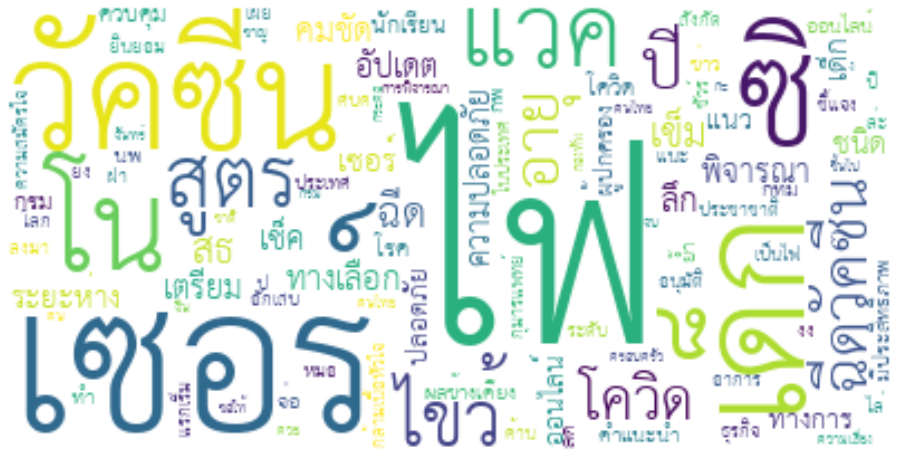

In [17]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path=path,background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [18]:
import requests
url = "https://api.aiforthai.in.th/ssense"

data = {'text':data3.iloc[0]}
headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
 
response = requests.post(url, data=data, headers=headers)


print(response.json())

{'sentiment': {'score': '0', 'polarity-neg': False, 'polarity-pos': False, 'polarity': ''}, 'preprocess': {'input': '"นพ.ยง" เปิดรับเด็ก 6-11 ปี ฉีดวัคซีนสูตรไขว้ \'ซิโนแวค - ไฟเซอร์\' ทำวิจัยเปรียบเทียบความปลอดภัย-ภูมิต้านทาน #วัคซีนโควิด #FM91', 'neg': [], 'pos': [], 'segmented': ['"', 'นพ.', 'ยง', '"', ' ', 'เปิดรับ', 'เด็ก', ' ', '6', '-', '11', ' ', 'ปี', ' ', 'ฉีดวัคซีน', 'สูตร', 'ไขว้', ' ', "'", 'ซิ', 'โน', 'แว', 'ค', ' ', '-', ' ', 'ไฟ', 'เซอร์', "'", ' ', 'ทำ', 'วิจัย', 'เปรียบเทียบ', 'ความปลอดภัย', '-', 'ภูมิต้านทาน', ' ', '#', 'วัคซีน', 'โค', 'วิด', ' ', '#', 'FM', '91'], 'keyword': ['นพ.', 'ยง', 'เปิดรับ', 'เด็ก', 'ปี', 'ฉีดวัคซีน', 'สูตร', 'ไขว้', 'ซิ', 'โน', 'แว', 'ไฟ', 'เซอร์', 'วิจัย', 'ความปลอดภัย', 'ภูมิต้านทาน', 'วัคซีน', 'โค', 'วิด', 'FM']}, 'alert': [], 'comparative': [], 'associative': [], 'intention': {'request': '0', 'sentiment': '0', 'question': '0', 'announcement': '0'}}


In [19]:
import requests
import seaborn as sns
import pandas as pd
import json

for i in range(0,40):
  url = "https://api.aiforthai.in.th/ssense"
  data = {'text':data3.iloc[i]}
  headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
  response = requests.post(url, data=data, headers=headers)
  #print(response.json())
  j1 = json.loads(response.text)
  j2 = j1["sentiment"]
  j3 = j2["polarity"]

  print(j3)
  #sns.lineplot(j3)



positive
positive
positive
positive
positive
positive
positive
positive
negative

negative
positive
positive
positive



positive
positive
positive




negative



negative


negative

negative

negative

positive


##Read result from analysis process

In [20]:
with open('/content/gdrive/My Drive/output_701/sinovac_pfizer.txt', 'r') as f:
    #print(sum(line.count("negative") for line in f))
    output1 = (sum(line.count("negative") for line in f))

In [21]:
print(output1)

7


In [22]:
with open('/content/gdrive/My Drive/output_701/sinovac_pfizer.txt', 'r') as f:
    #print(sum(line.count("positive") for line in f))
    output2 = (sum(line.count("positive") for line in f))

In [23]:
print(output2)

15


In [24]:
output3 = data3.size - (output1+output2)

In [25]:
print(output3)

18


In [26]:
final1 = [output2,output3,output1]

In [27]:
print(final1)

[15, 18, 7]


In [28]:
final2 = output2+output3+output1
print(final2)

40


In [29]:
final_out2 = output2*100/final2
final_out1 = output1*100/final2
final_out3 = output3*100/final2

In [30]:
print("percent of positive sentiment is "'{:.2f}'.format(final_out2))
print("percent of neutral sentiment is "'{:.2f}'.format(final_out3))
print("percent of negative sentiment is "'{:.2f}'.format(final_out1))

percent of positive sentiment is 37.50
percent of neutral sentiment is 45.00
percent of negative sentiment is 17.50


In [31]:
final_last = [final_out2,final_out3,final_out1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


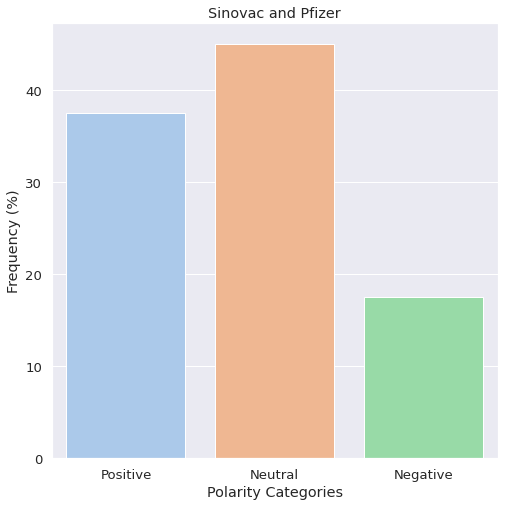

In [32]:
from google.colab import files

labels = ['Positive','Neutral','Negative']

#sns.set_style('ticks')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8, 8))
ax = sns.barplot(labels,final_last, palette = 'pastel')
ax.set(title="Sinovac and Pfizer")
plt.xlabel("Polarity Categories")
plt.ylabel("Frequency (%)")
plt.show()
#plt.savefig("sinovac_pfizer.png")
#files.download("sinovac_pfizer.png") 